In [78]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
df=pd.read_csv('Book2.csv')
df.isnull().sum()

type               0
title              0
director        1219
cast             379
country          276
date_added         7
release_year       0
rating             6
duration           0
genres             0
description        0
dtype: int64

In [80]:
# Count the instances for each class in your target variable
class_counts = df['type'].value_counts()
print(class_counts)

Movie      2763
TV Show    1236
Name: type, dtype: int64


In [81]:
y=df['type']

In [82]:
X=df.loc[: , df.columns != 'type']
df

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...
3994,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,14-Sep-19,2019,TV-14,157,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3995,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,25-Sep-19,2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3996,Movie,Oh! Baby (Tamil),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,25-Sep-19,2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3997,TV Show,Ojos in d' House,NaN,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od...",Nigeria,22-Aug-20,2013,TV-G,1,"International TV Shows, TV Comedies",After a newly rich family moves into an upper-...


In [83]:
warnings.filterwarnings("ignore")
l=LabelEncoder()
#create an object we get the code that execute
l.fit(df[['type']])
#fit reads the data then creates a dictionary of the two values movie=0 tv=1 randomly
#it works from 0 to n-1 it looks for  the uniqe values and put values
df['type_t']=l.transform(df[['type']])
#transform it compare the dictionary with dataset and change the data depending on the dictionary


In [9]:
df = df.drop('type', axis=1)
#axis =1 column

In [10]:
dff = pd.DataFrame(df)
print(dff.dtypes)

title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
type_t           int32
dtype: object


In [11]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [12]:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
dff = pd.DataFrame(df)
print(dff.dtypes)

title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
genres                  object
description             object
type_t                   int32
month_added            float64
year_added             float64
dtype: object


In [13]:
df = df.drop('date_added', axis=1)

In [14]:
df[['month_added']].isnull().sum()

month_added    7
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
i = SimpleImputer(missing_values=np.nan, strategy='mean')
i = SimpleImputer()
i = i.fit(df[['year_added']])
df[['year_add']] = i.transform(df[['year_added']])
df = df.drop('year_added', axis=1)

In [16]:
i = SimpleImputer(missing_values=np.nan, strategy='mean')
i = SimpleImputer()
i = i.fit(df[['month_added']])
df[['month_add']] = i.transform(df[['month_added']])
df = df.drop('month_added', axis=1)

In [17]:
df[['month_add']].isnull().sum()

month_add    0
dtype: int64

In [18]:
i = SimpleImputer(strategy='most_frequent')

i = i.fit(df[['cast']])
df[['castt']] = i.transform(df[['cast']])
df = df.drop('cast', axis=1)

In [19]:
i = SimpleImputer(strategy='most_frequent')
i = i.fit(df[['country']])
df[['countryy']] = i.transform(df[['country']])
df = df.drop('country', axis=1)

In [20]:
df['director'].fillna('Unknown', inplace=True)

In [21]:
df.isnull().sum()

title           0
director        0
release_year    0
rating          6
duration        0
genres          0
description     0
type_t          0
year_add        0
month_add       0
castt           0
countryy        0
dtype: int64

In [22]:
X = pd.get_dummies(df, columns=['director','castt','countryy','rating','genres','description'])
X

,title,release_year,duration,type_t,year_add,month_add,director_A. L. Vijay,director_Aadish Keluskar,director_Aamir Bashir,director_Aaron Burns,...,"description_Young chef Soma enters the prestigious Totsuki Culinary Academy, where he must emerge victorious in over-the-top cooking battles or face expulsion.",description_Young fashion designers vie for the chance to become Mexico's next big talent by competing before judges in grueling tests of creativity and stamina.,"description_Young journalists working for a magazine juggle careers, romance and other challenges while reporting on social issues and news stories in Malaysia.",description_Young koala caretaker Izzy Bee and her family rescue cuddly creatures in need and help them head back into the wild on Australia’s Magnetic Island.,"description_Young motocross racer Miles Hill helps a top-secret robotic combat dog evade its ruthless creator and the military, who are in hot pursuit.","description_Young radio announcers from varying backgrounds encounter the supernatural in mysterious dreams, accidents and everyday life.","description_Young urbanites renovating a rundown house, and a psychiatrist grieving his son's disappearance, are connected to a supernatural, decades-old secret.","description_Yumeko Jabami enrolls at Hyakkaou Private Academy, where students are ranked by their gambling winnings and fame and fortune awaits those on top.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise."
0,3%,2020,4,1,2020.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1920,2008,143,0,2017.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 Heroines,2016,124,0,2019.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Blue Mountain State: The Rise of Thadland,2016,90,0,2016.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Blue Planet II,2017,1,1,2018.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Oh! Baby,2019,157,0,2019.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3995,Oh! Baby (Malayalam),2019,146,0,2019.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,Oh! Baby (Tamil),2019,146,0,2019.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,Ojos in d' House,2013,1,1,2020.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X=pd.get_dummies(X, columns=['title'])

In [25]:
y_binary_imbalanced = y.copy()
# y.info()

y_binary_imbalanced = (y_binary_imbalanced == 'Movie').astype(int)
y_binary_imbalanced.info()
# print('Original labels:\t', y[1:4000])
# print('New binary labels:\t', y_binary_imbalanced[1:4000])


<class 'pandas.core.series.Series'>
RangeIndex: 3999 entries, 0 to 3998
Series name: type
Non-Null Count  Dtype
--------------  -----
3999 non-null   int32
dtypes: int32(1)
memory usage: 15.8 KB


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0,test_size=0.2)
print(pd.Series(y_train).value_counts())
print(np.unique(y))

1    2199
0    1000
Name: type, dtype: int64
['Movie' 'TV Show']


In [28]:
clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [29]:
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [30]:
y_predict_prob = clf.predict_proba(X_test)
y_predict_prob

array([[9.99237089e-01, 7.62910622e-04],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [9.98896062e-01, 1.10393810e-03],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [31]:
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))

Accuracy of Logistic regression classifier on train set: 0.9981244138793373
Accuracy of Logistic regression classifier on test set: 0.99875


In [32]:
from sklearn.preprocessing import StandardScaler#MinMaxScaler
scaler = StandardScaler()#MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression().fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_test_scaled, y_test))

Accuracy of Logistic regression classifier on test set: 1.0
Accuracy of Logistic regression classifier on train set: 0.99625


{'whiskers': [<matplotlib.lines.Line2D at 0x1edcf3545d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1edcf355bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edcec09590>],
 'medians': [<matplotlib.lines.Line2D at 0x1edcf357010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edcf357810>],
 'means': []}

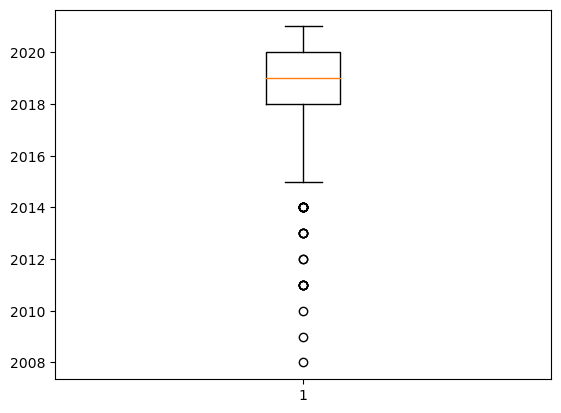

In [33]:


warnings.filterwarnings("ignore")

plt.figure()
cases=X["year_add"]
plt.boxplot(cases)



{'whiskers': [<matplotlib.lines.Line2D at 0x1edb1f08410>,
 'caps': [<matplotlib.lines.Line2D at 0x1edb1ee7c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edb1ee3490>],
 'medians': [<matplotlib.lines.Line2D at 0x1edb1f0a9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edb1f09490>],
 'means': []}

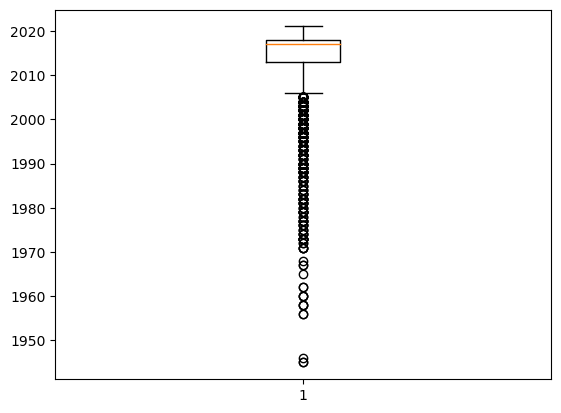

In [34]:
warnings.filterwarnings("ignore")
plt.figure()
cases=X["release_year"]
plt.boxplot(cases)

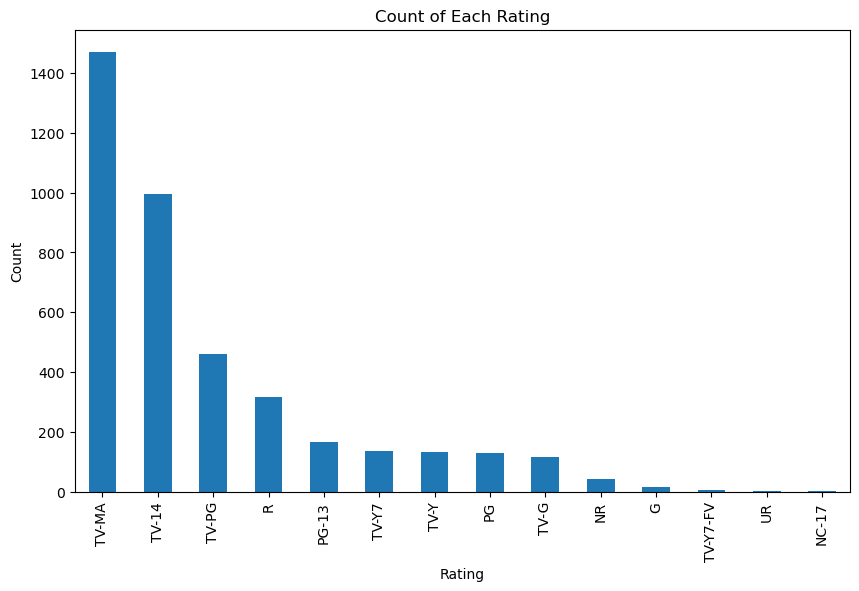

In [35]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

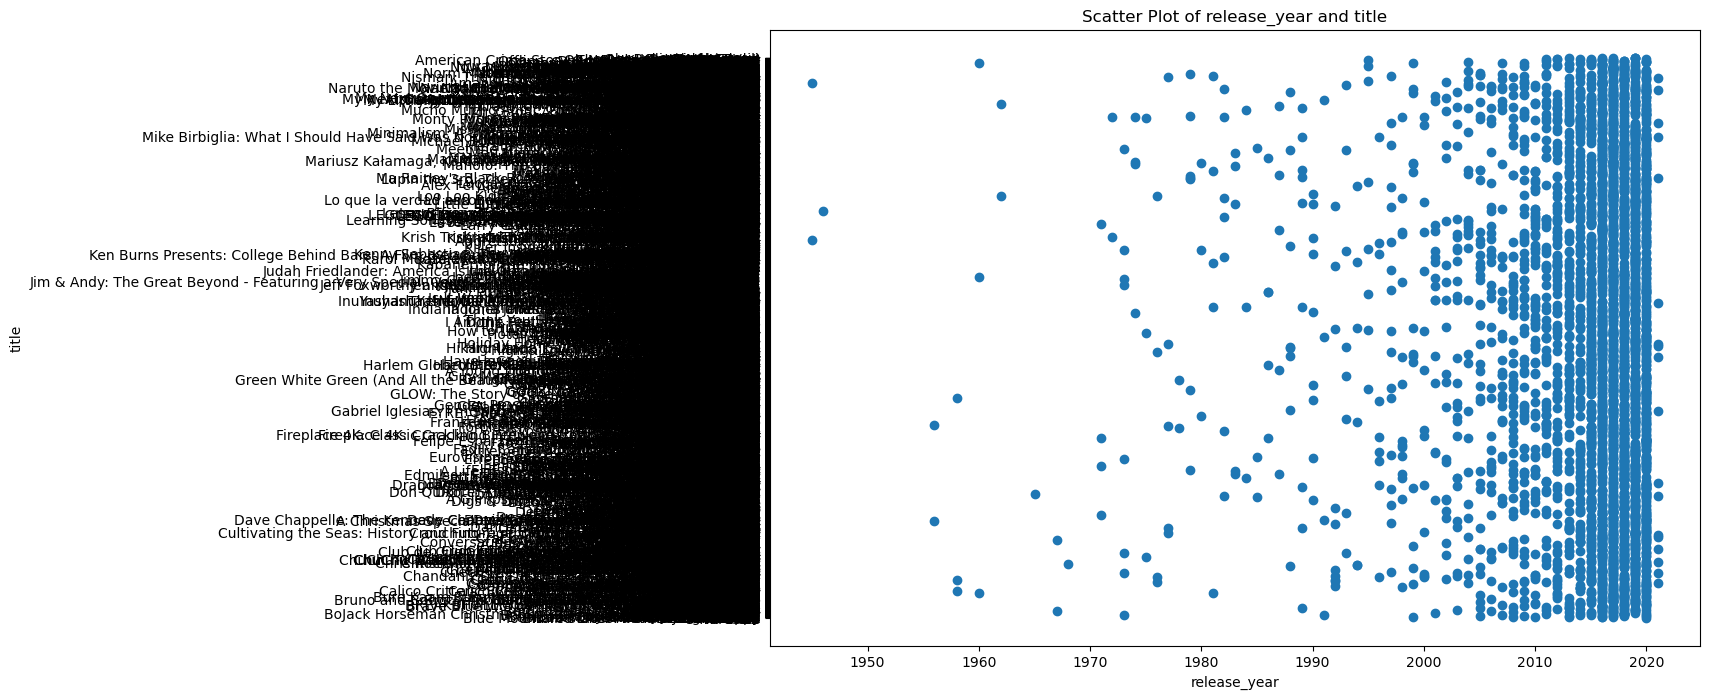

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(x='release_year', y='title', data=df)
warnings.filterwarnings("ignore")
plt.title('Scatter Plot of release_year and title')
plt.xlabel('release_year')
plt.ylabel('title')
plt.show()


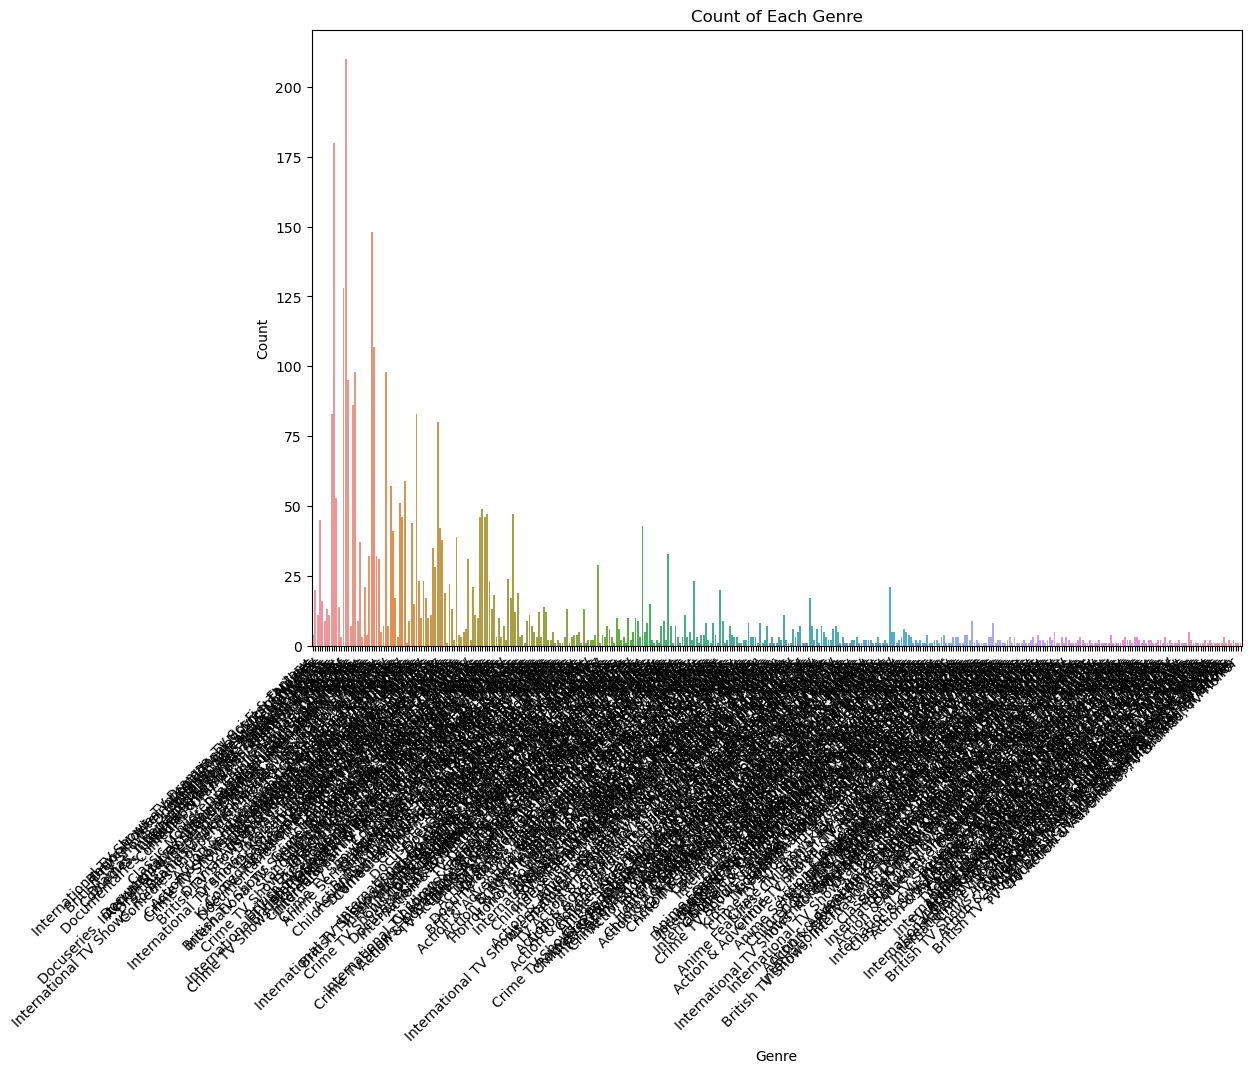

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='genres', data=df)
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


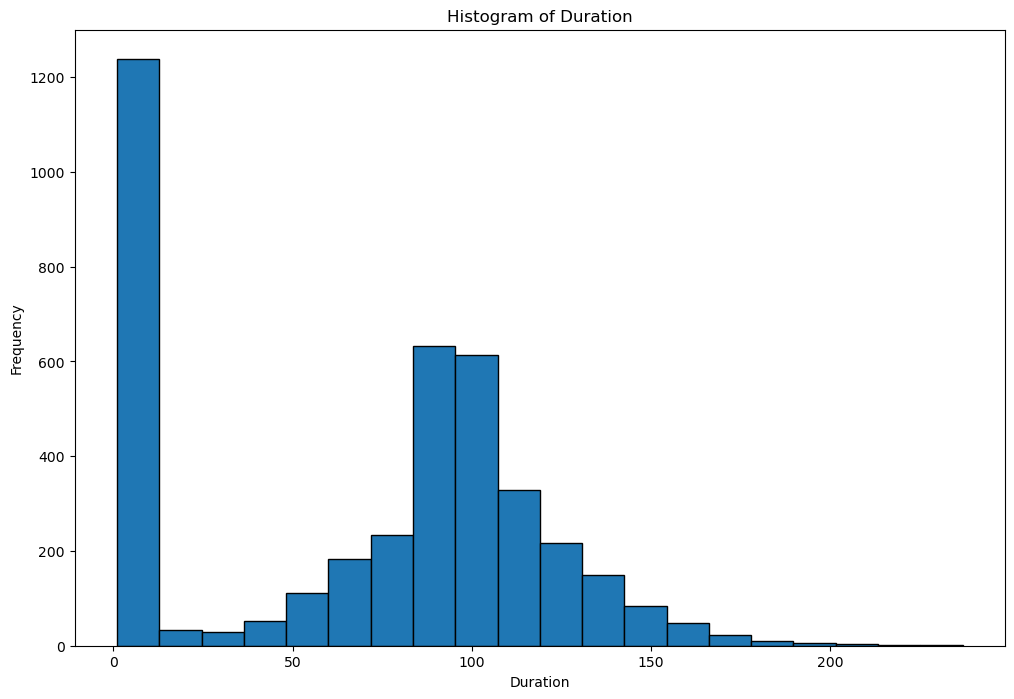

In [38]:
plt.figure(figsize=(12, 8))
plt.hist(df['duration'], bins=20, edgecolor='black')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


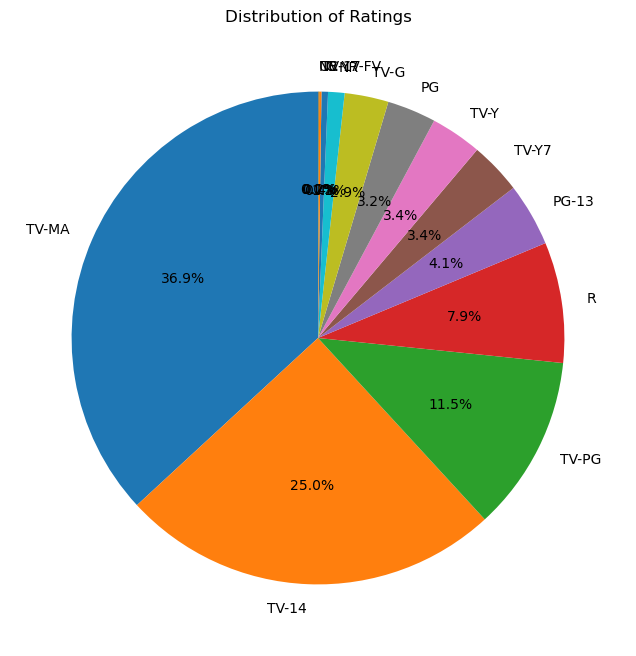

In [39]:
plt.figure(figsize=(8, 8))
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()


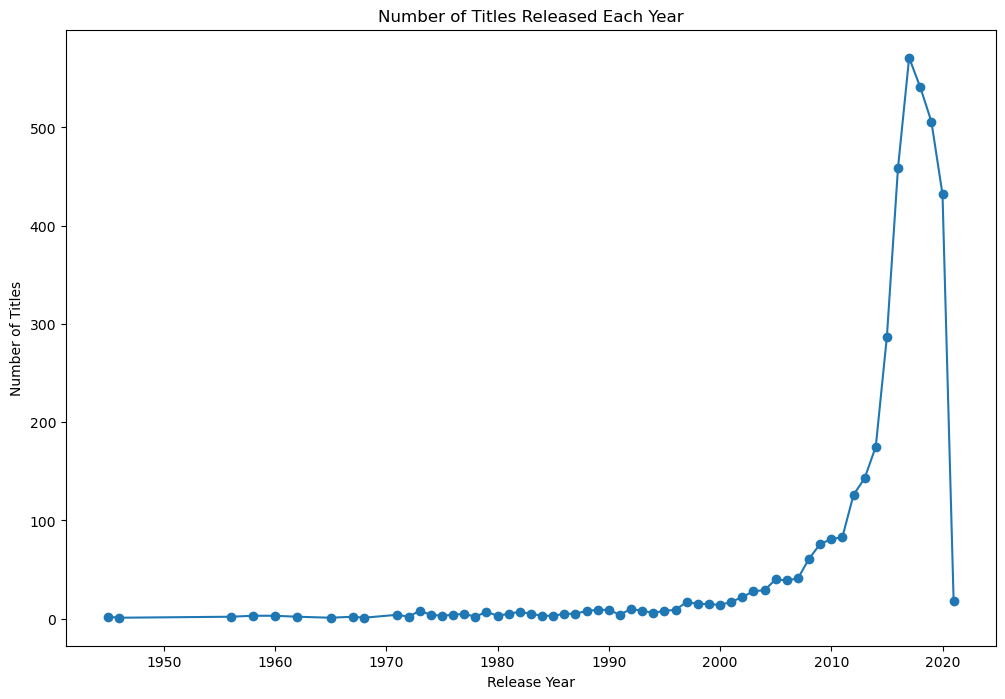

In [40]:
plt.figure(figsize=(12, 8))
df.groupby('release_year')['title'].count().plot(kind='line', marker='o')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


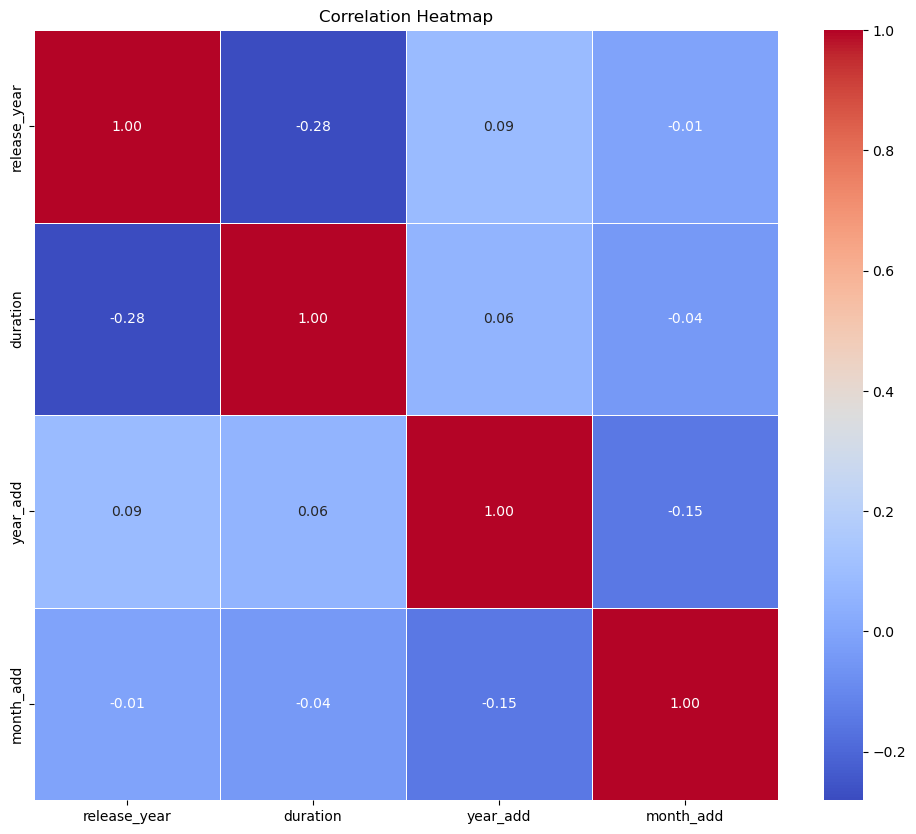

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


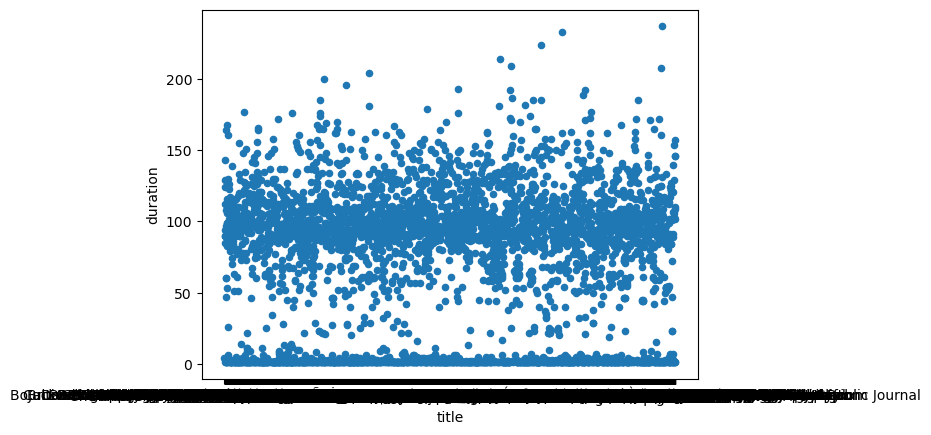

In [42]:
df.plot('title', 'duration', kind='scatter')
warnings.filterwarnings("ignore")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed9dbbb890>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed9dc28890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed9d7d2c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed9dc10d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed9bc14650>],
 'means': []}

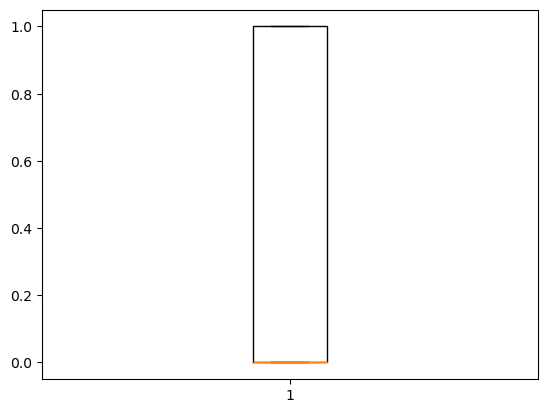

In [43]:
warnings.filterwarnings("ignore")

plt.figure()
cases=X["type_t"]
plt.boxplot(cases)

Accuracy of svm classifier on test set: 1.0
Accuracy of svm classifier on test set: 1.0
Random class-proportional prediction (svm classifier)
 [[236   0]
 [  0 564]]
Precision: 1.00
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



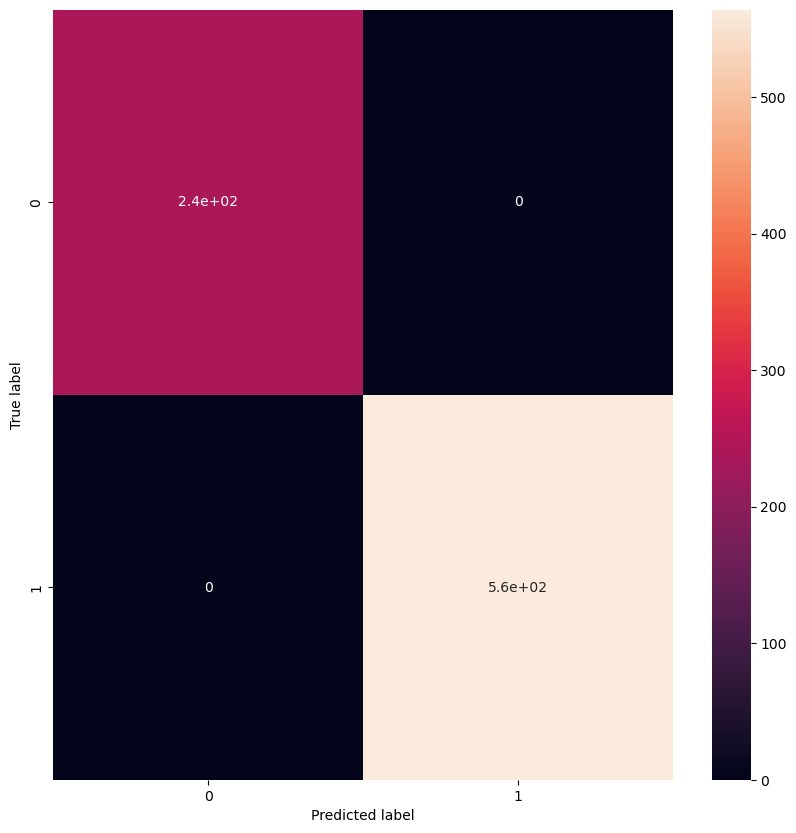

In [99]:
clf=SVC(kernel="linear",C=1)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Accuracy of svm classifier on test set: 1.0
Accuracy of svm classifier on test set: 1.0
Random class-proportional prediction (svm classifier)
 [[236   0]
 [  0 564]]
Precision: 1.00
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



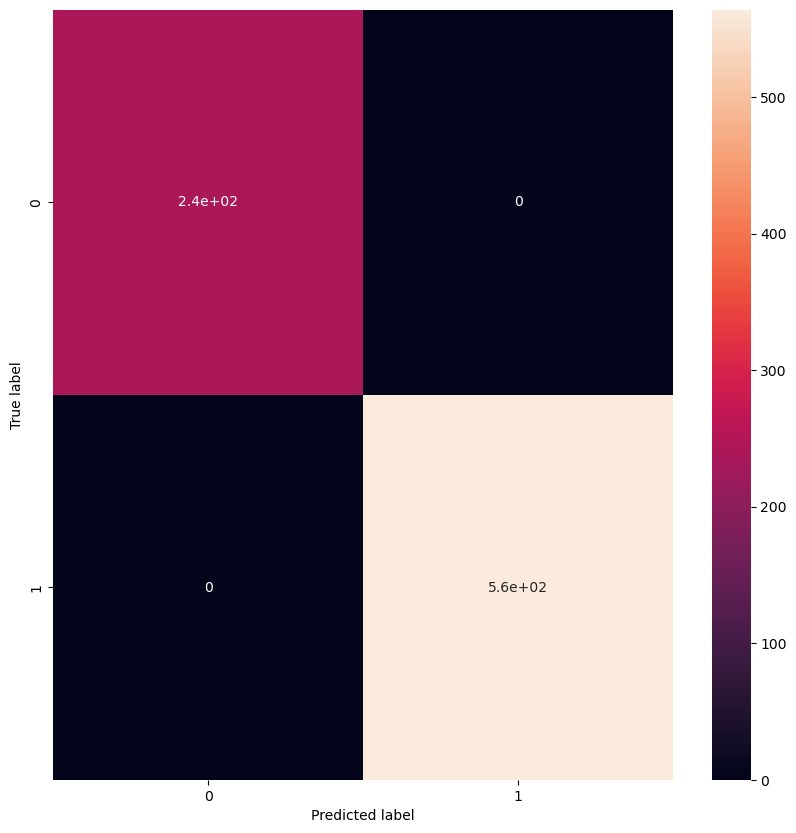

In [100]:
clf=SVC(kernel="linear",C=100)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Accuracy of svc classifier on test set: 0.9831197249140357
Accuracy of svc classifier on test set: 0.98125
Random class-proportional prediction (svc classifier)
 [[236   0]
 [ 15 549]]
Precision: 0.94
              precision    recall  f1-score   support

       not 1       0.94      1.00      0.97       236
           1       1.00      0.97      0.99       564

    accuracy                           0.98       800
   macro avg       0.97      0.99      0.98       800
weighted avg       0.98      0.98      0.98       800



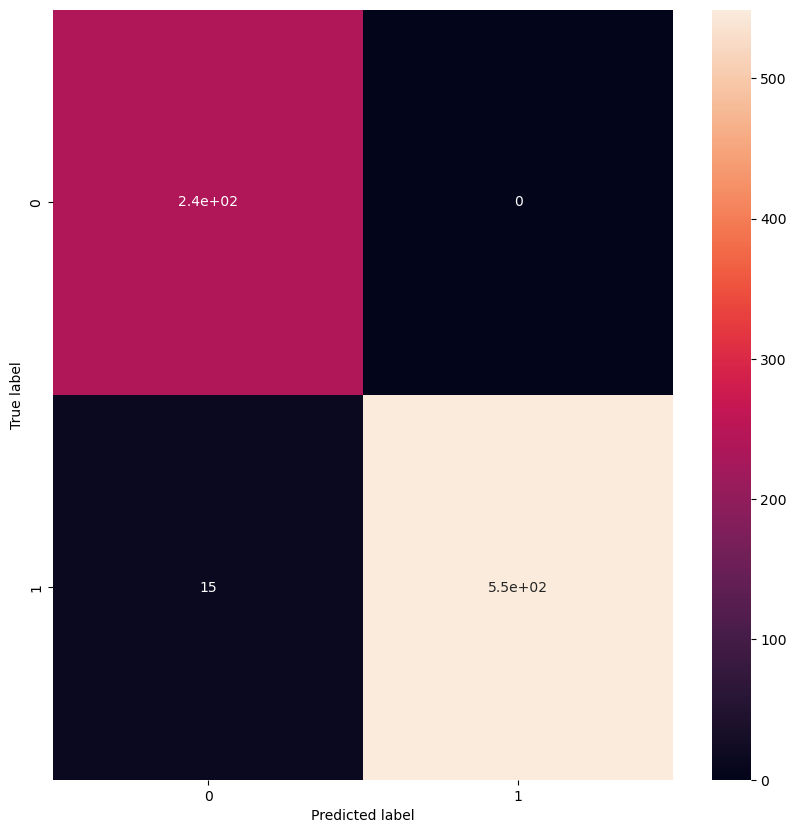

In [101]:
clf=SVC(kernel="poly",degree=10,C=1)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
print('Accuracy of svc classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svc classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svc classifier)\n', confusion)
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Accuracy of svm classifier on test set: 0.9837449202875899
Accuracy of svm classifier on test set: 0.9825
Random class-proportional prediction (svm classifier)
 [[236   0]
 [ 14 550]]
              precision    recall  f1-score   support

       not 1       0.94      1.00      0.97       236
           1       1.00      0.98      0.99       564

    accuracy                           0.98       800
   macro avg       0.97      0.99      0.98       800
weighted avg       0.98      0.98      0.98       800



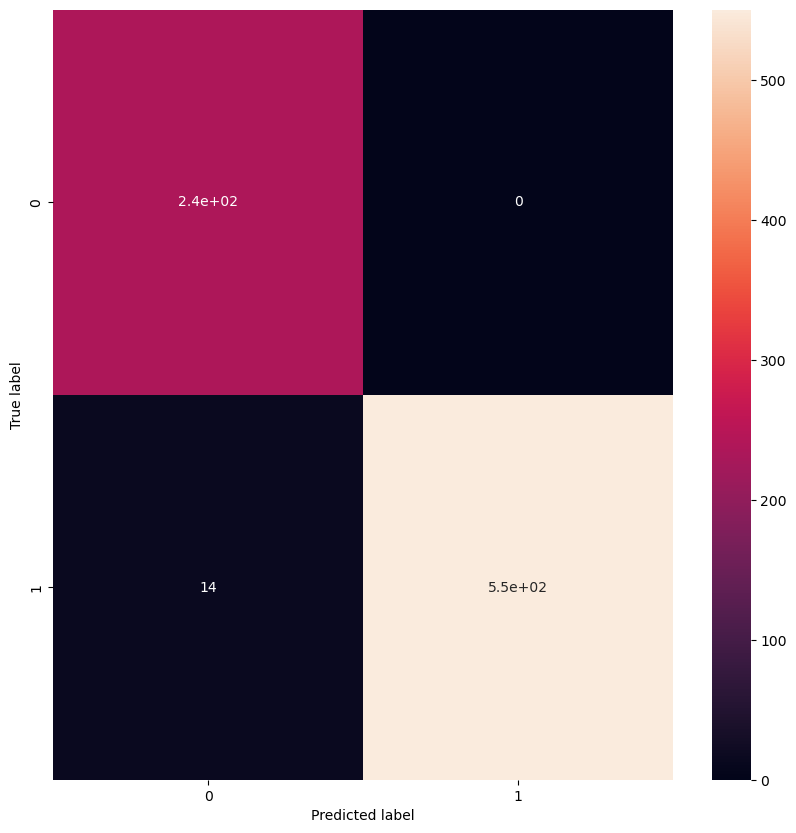

In [102]:
clf=SVC(kernel="poly",degree=5,C=3)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Precision: 0.95
Accuracy of svm classifier on test set: 0.9862457017818068
Accuracy of svm classifier on test set: 0.98375
Random class-proportional prediction (svm classifier)
 [[236   0]
 [ 13 551]]


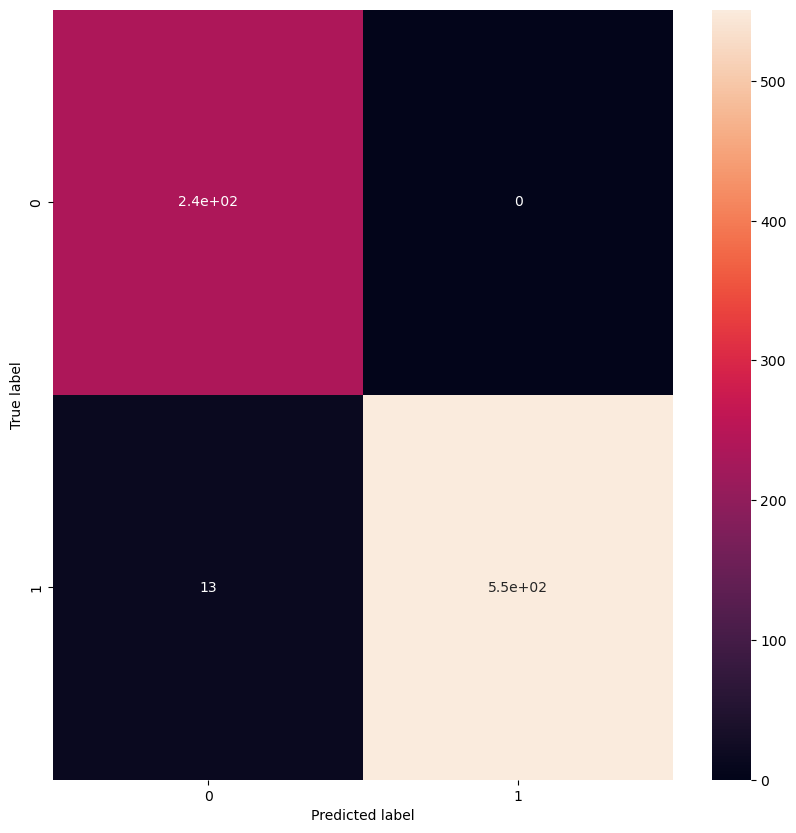

In [90]:
clf=SVC(kernel="poly",degree=11,C=4)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)

Accuracy of svm classifier on test set: 0.9790559549859331
Accuracy of svm classifier on test set: 0.97875
Random class-proportional prediction (svm classifier)
 [[236   0]
 [ 17 547]]
              precision    recall  f1-score   support

       not 1       0.93      1.00      0.97       236
           1       1.00      0.97      0.98       564

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800



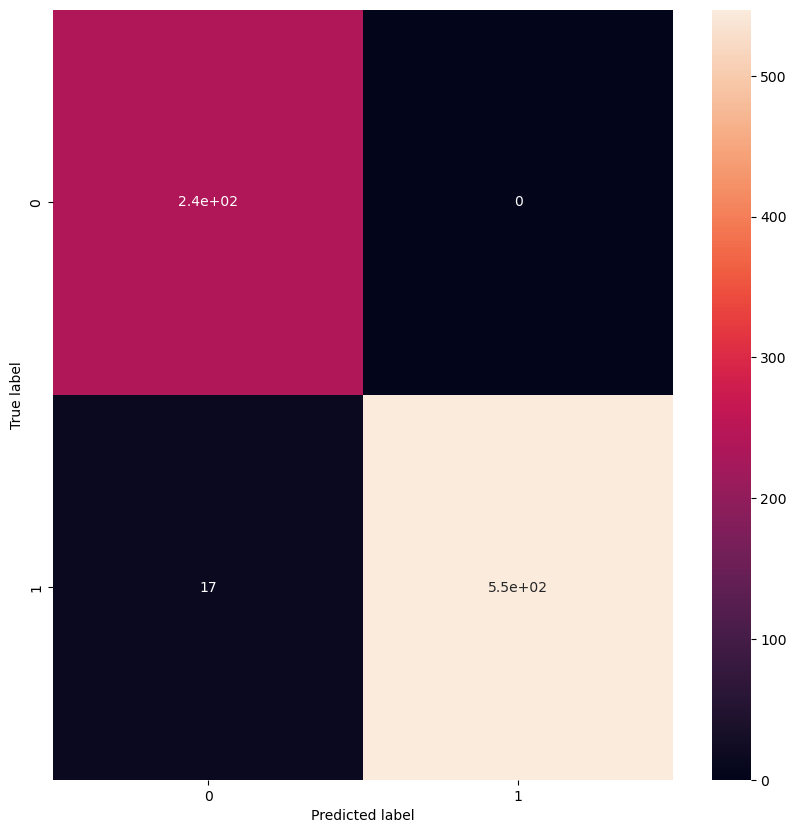

In [103]:
clf=SVC(kernel="poly",degree=5,C=1)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Precision: 0.93
Accuracy of svm classifier on test set: 0.976242575804939
Accuracy of svm classifier on test set: 0.9775
Random class-proportional prediction (svm classifier)
 [[236   0]
 [ 18 546]]


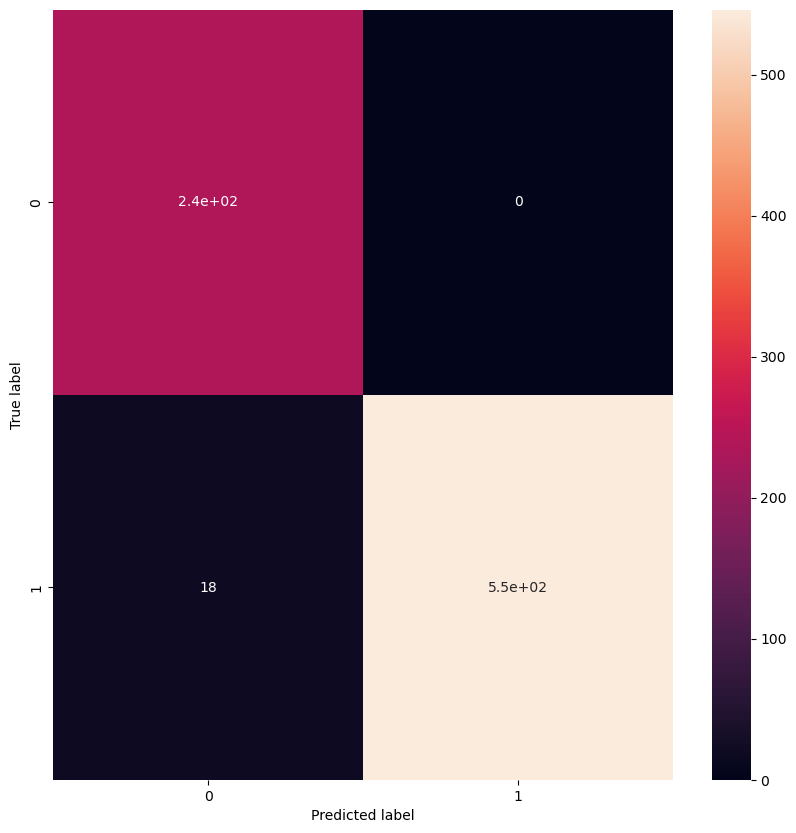

In [91]:
clf=SVC(kernel="rbf",gamma="scale",C=2)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')


print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)

Accuracy of svm classifier on test set: 0.9993748046264458
Accuracy of svm classifier on test set: 0.9975
Random class-proportional prediction (svm classifier)
 [[234   2]
 [  0 564]]
              precision    recall  f1-score   support

       not 1       1.00      0.99      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



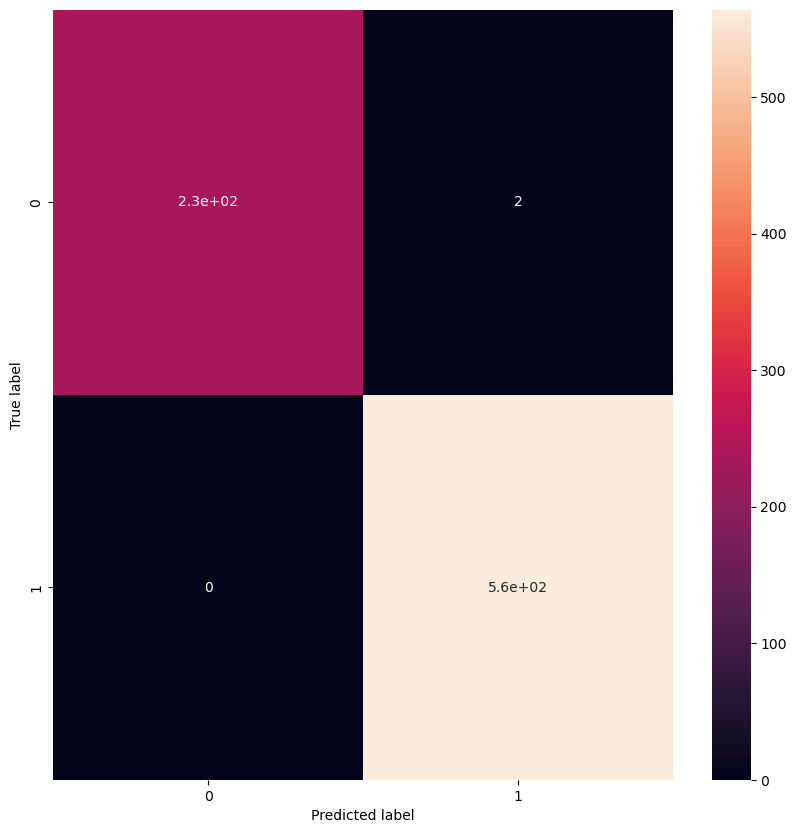

In [104]:
clf=SVC(kernel="rbf",gamma=0.01,C=2)
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Precision: 1.00
Accuracy of svm classifier on test set: 1.0
Accuracy of svm classifier on test set: 1.0
Random class-proportional prediction (svm classifier)
 [[236   0]
 [  0 564]]
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



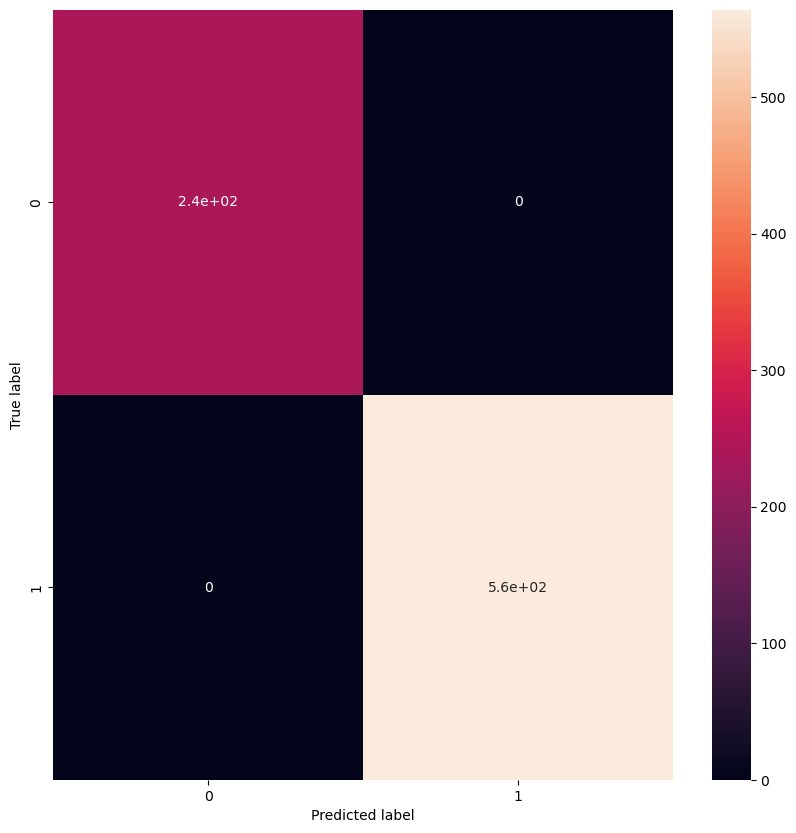

In [109]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Accuracy of svm classifier on test set: 0.9993748046264458
Accuracy of svm classifier on test set: 0.9975
Random class-proportional prediction (svm classifier)
 [[236   0]
 [  1 563]]
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



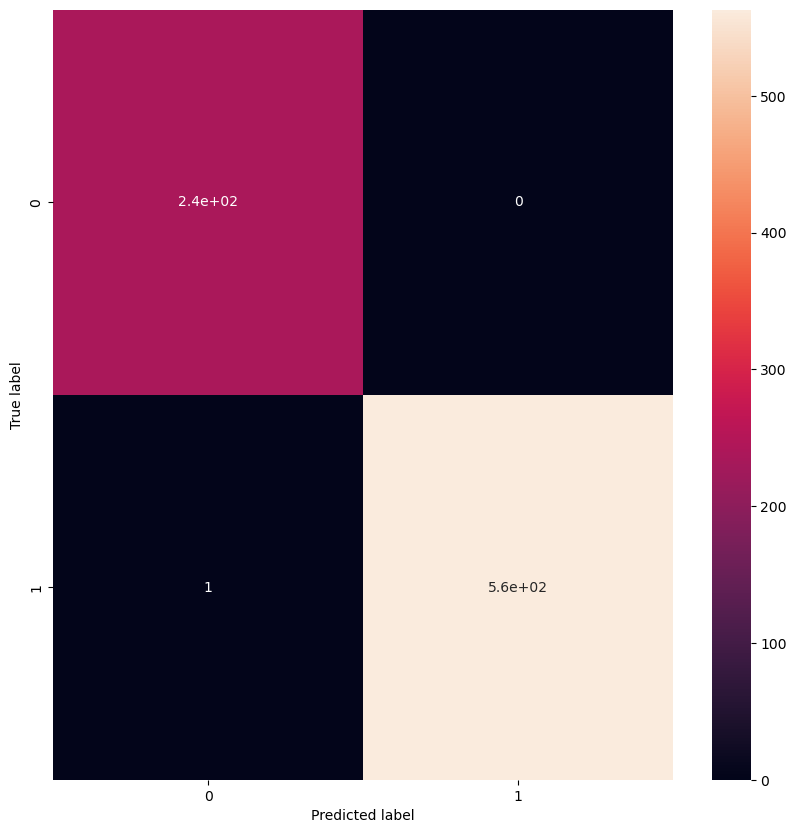

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
# Assuming you have already defined X_train, X_test, y_train, y_test as Pandas DataFrames
X_train_dense = X_train.values  # Convert Pandas DataFrame to NumPy array
X_test_dense = X_test.values    # Convert Pandas DataFrame to NumPy array
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_dense, y_train)
yhat = knn.predict(X_test_dense)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Precision: 1.00
Accuracy of svm classifier on test set: 1.0
Accuracy of svm classifier on test set: 0.99875
Random class-proportional prediction (svm classifier)
 [[235   1]
 [  0 564]]
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



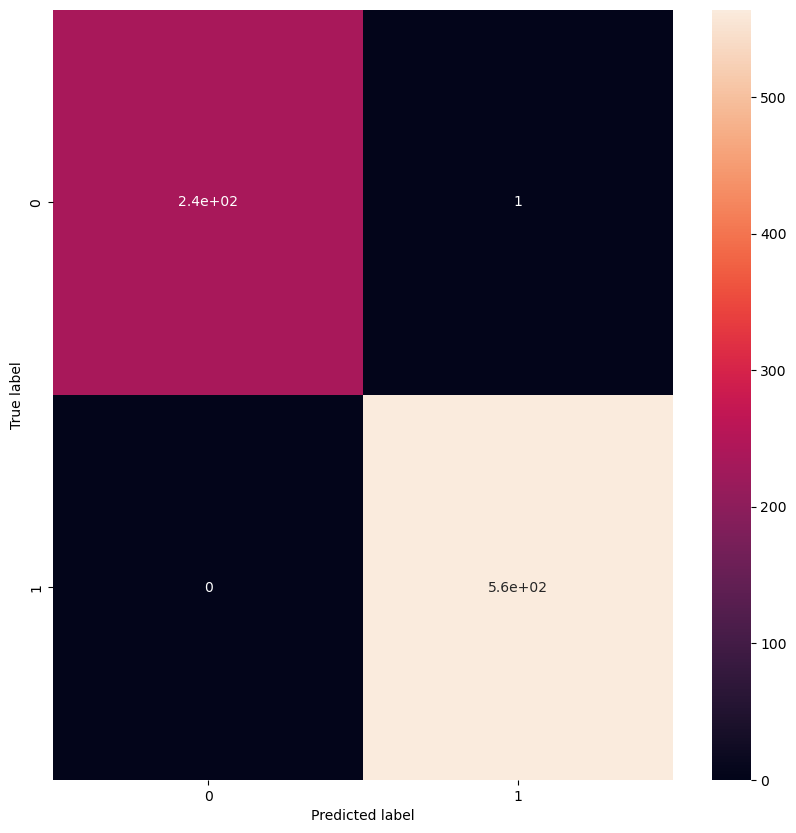

In [106]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of svm classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of svm classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Accuracy of Logistic regression classifier on test set: 1.0
Accuracy of Logistic regression classifier on test set: 1.0
Random class-proportional prediction (svm classifier)
 [[235   1]
 [  0 564]]
Precision: 1.00
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



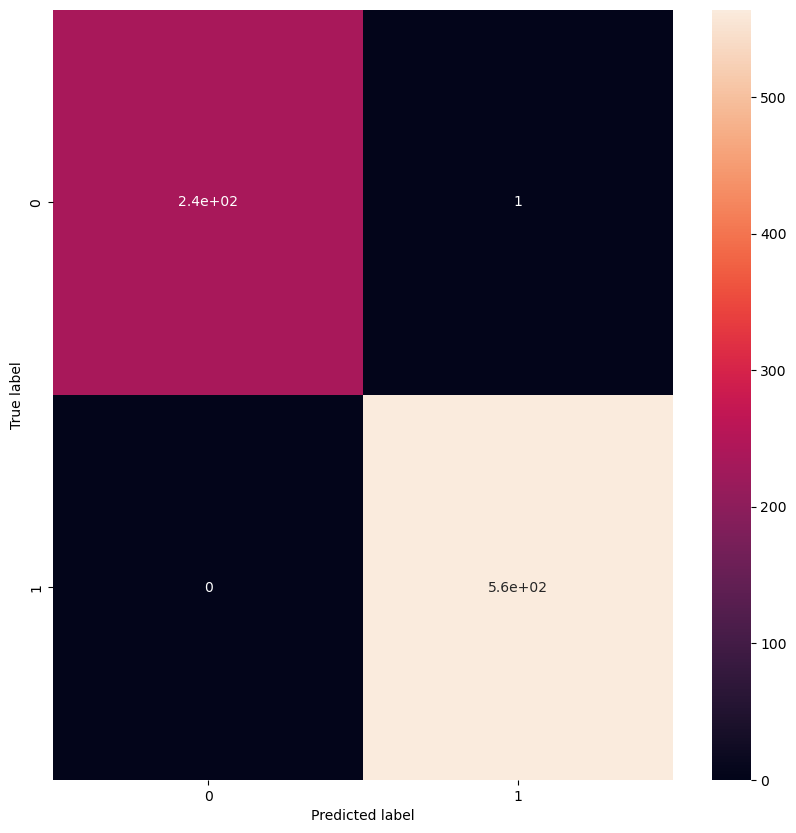

In [108]:
from sklearn.linear_model import Perceptron 
#Making a perceptron classifier 
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42) 
perceptron.fit(X_train, y_train) 
#Making prediction on test data 
y_pred = perceptron.predict(X_test) 
#Finding accuracy 
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

Precision: 1.00
Accuracy of Logistic regression classifier on test set: 1.0
Accuracy of Logistic regression classifier on test set: 1.0
Random class-proportional prediction (svm classifier)
 [[235   1]
 [  0 564]]
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       564

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



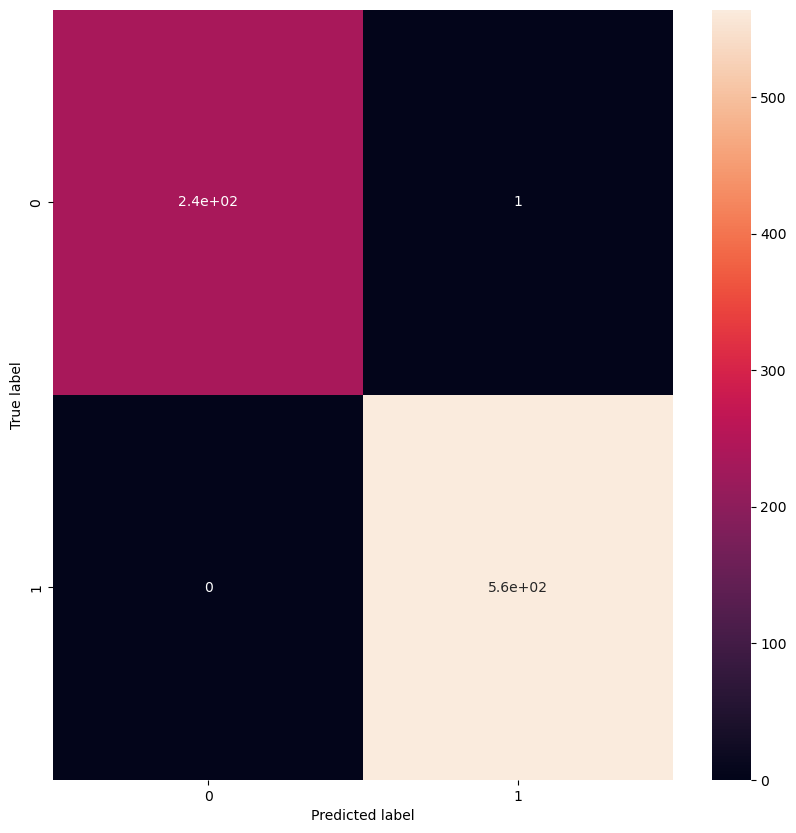

In [107]:
from sklearn.ensemble import RandomForestClassifier 

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
clf.predict(X_test) 
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
print('Precision: {:.2f}'.format(precision_score(y_test, yhat,pos_label=0)))
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train,y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test,y_test))
print('Random class-proportional prediction (svm classifier)\n', confusion)
print(classification_report(y_test,yhat, target_names=['not 1', '1']))

In [ ]:
# Assuming 'type' is your target variable
class_counts = dataset['type'].value_counts()
print(class_counts)